# Import libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.core.reshape.pivot import pivot_table

# create dataframe

In [27]:
dataframe = pd.read_csv("Zomato data .csv")
print(dataframe)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

# convert the datatype of column - rate

In [38]:
def handlerate(value):
    value = str(value).split('/')
    value = value[0];
    return float(value)

dataframe['rate'] = dataframe['rate'].apply(handlerate)

print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [39]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


# Type of restaurant like dining, cafe etc which one is mostly used

Text(0.5, 0, ' Type of restaurant')

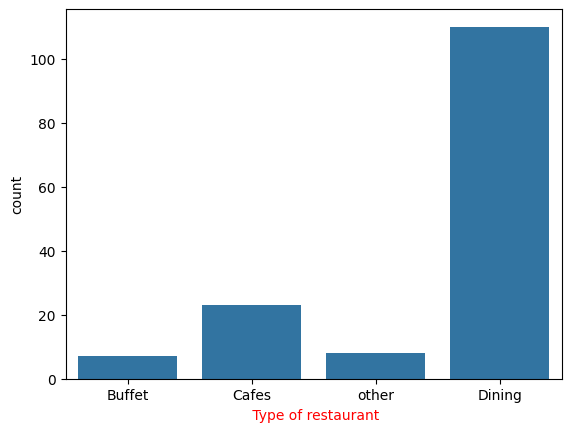

In [40]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel(" Type of restaurant" , c = 'red')

# From above we conclude that Dinning  mostly used by  customer.

# Which type of restaurant have high votes like dining, cafes, buffet etc.

Text(0, 0.5, 'Votes')

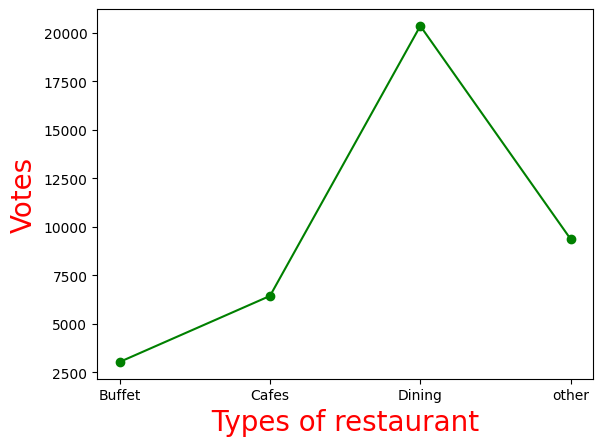

In [41]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes':grouped_data})
plt.plot(result, c="green", marker="o")
plt.xlabel(" Types of restaurant ", c="red", size= 20)
plt.ylabel("Votes", c="red", size= 20)

# From that we conclude that the dining have a maximum choice of the customer That is the high ratings for the timing from above the graph.

# We have to find that which rating is mostly given by the customer.

Text(0.5, 1.0, 'rating distribution')

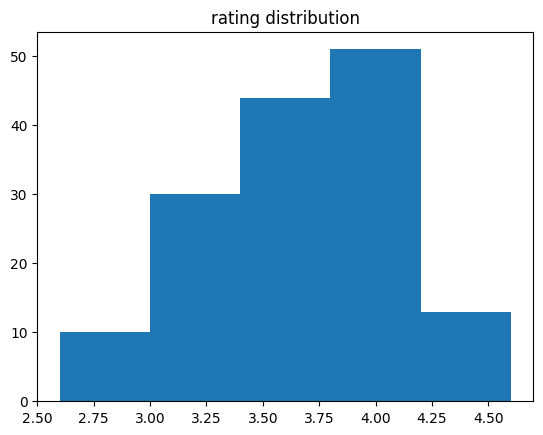

In [42]:
plt.hist(dataframe['rate'], bins = 5)
plt.title("rating distribution")

# From above we conclude that majority restaurant get the rating between 3.5 to 4

# Average spending on each order by the couples

Text(0.5, 0, ' couple data')

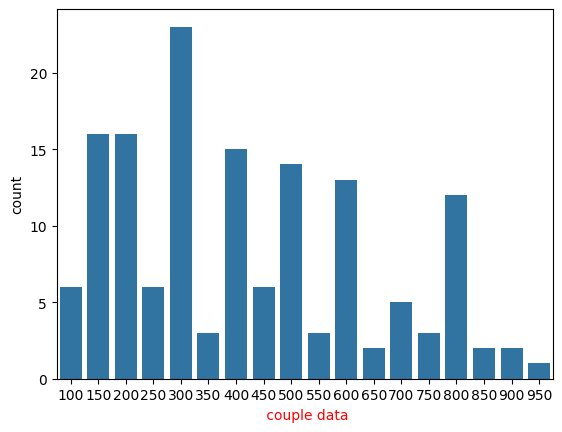

In [43]:
sns.countplot(x=dataframe['approx_cost(for two people)'])
plt.xlabel(" couple data" , c = 'red')

# From above data we conclude that the average spend is of INR 300 by the couples 

# We have to  Find which mode get highest rating. That is online or offline.

<Axes: xlabel='online_order', ylabel='rate'>

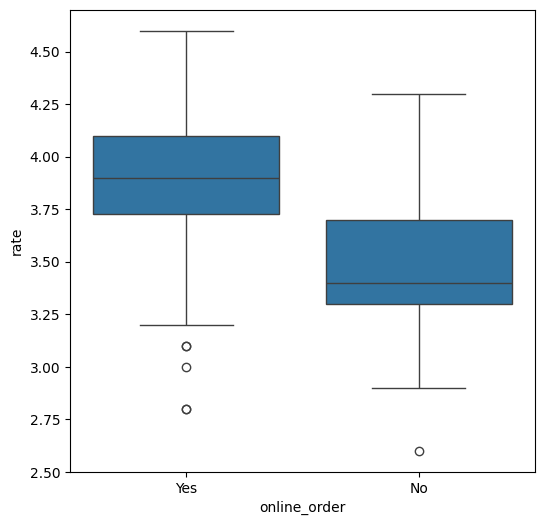

In [44]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y ='rate', data =dataframe)

# From above we concluded that Offline orders get lower rating as compared to online orders.

# Which type of restaurant get most order like dining cafes buffet etc.

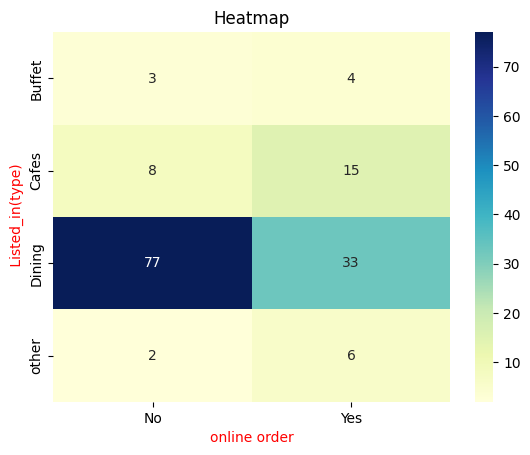

In [45]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title("Heatmap")
plt.xlabel("online order", c='red')
plt.ylabel(" Listed_in(type)", c='red')
plt.show()


# From above we concluded that the dining type of restaurants have most of the order of offline.